In [17]:
%matplotlib inline
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

pd.set_option('display.max_rows', 200)

filepath = os.path.join('Resources', 'countries.csv')
eco_csv = pd.read_csv(filepath, header=0)
# eco_csv.head()

In [3]:
# New dataframe with only GDP, HDI & Footprint
my_df = pd.DataFrame(eco_csv.iloc[:,[0,1,2,3,4,10,17]])
my_df['GDP per Capita'] = my_df['GDP per Capita'].str.replace('$','')
my_df['GDP per Capita'] = my_df['GDP per Capita'].str.replace(',','')
my_df['GDP per Capita'] = my_df['GDP per Capita'].astype(float)
my_df['Footprint per Mil Persons'] = my_df['Total Ecological Footprint']/my_df['Population (millions)']
my_df.dropna(how='any', inplace=True)
# my_df.count()
# my_df.dtypes
my_df.head()

,Country,Region,Population (millions),HDI,GDP per Capita,Total Ecological Footprint,Biocapacity Deficit or Reserve,Footprint per Mil Persons
0,Afghanistan,Middle East/Central Asia,29.82,0.46,614.66,0.79,-0.30,0.026492
1,Albania,Northern/Eastern Europe,3.16,0.73,4534.37,2.21,-1.03,0.699367
2,Algeria,Africa,38.48,0.73,5430.57,2.12,-1.53,0.055094
3,Angola,Africa,20.82,0.52,4665.91,0.93,1.61,0.044669
4,Antigua and Barbuda,Latin America,0.09,0.78,13205.10,5.38,-4.44,59.777778


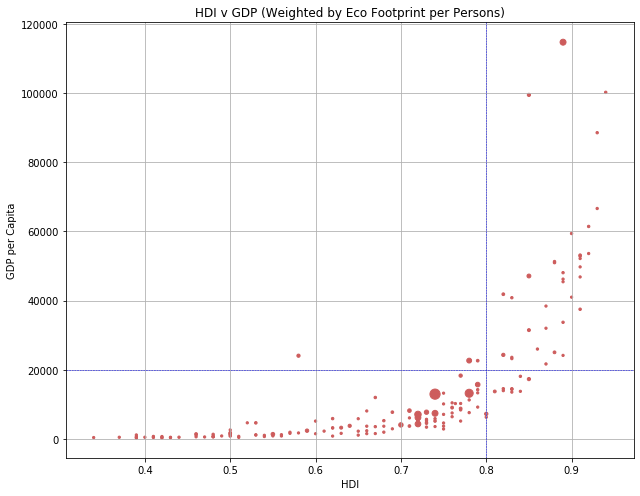

In [13]:
# Scatter plot of HDI v GDP weighted by Footprint
hdi = my_df['HDI'].tolist()
gdp = my_df['GDP per Capita'].tolist()
# bdr = my_df['Biocapacity Deficit or Reserve'].tolist()
footprint = my_df['Footprint per Mil Persons'].tolist()
footprint = [dot+5 for dot in footprint]

fig, ax = plt.subplots(figsize=(9,7))
plt.scatter(hdi, gdp, s=footprint, color='indianred')
plt.title('HDI v GDP (Weighted by Eco Footprint per Persons)')
plt.xlabel('HDI')
plt.ylabel('GDP per Capita')
plt.grid()
plt.axhline(y=20000, linewidth=0.5, linestyle = '--', color='blue')
plt.axvline(x=0.80, linewidth=0.5, linestyle = '--', color='blue')
plt.tight_layout()
plt.savefig('Images/footprint_development.png')
plt.show()


In [30]:
# Developing Countries with HDI Between 0.7 & 0.8
developing = my_df.loc[(my_df['HDI']>=0.7) & (my_df['HDI']<0.8),:]
developing = developing.sort_values('Region')
developing.reset_index(inplace=True, drop=True)
developing.head()
developing.count()

Country                           51
Region                            51
Population (millions)             51
HDI                               51
GDP per Capita                    51
Total Ecological Footprint        51
Biocapacity Deficit or Reserve    51
Footprint per Mil Persons         51
dtype: int64

In [29]:
# Developed Countries with HDI > 0.8
developed = my_df.loc[(my_df['HDI']>=0.8),:]
developed.count()

Country                           45
Region                            45
Population (millions)             45
HDI                               45
GDP per Capita                    45
Total Ecological Footprint        45
Biocapacity Deficit or Reserve    45
Footprint per Mil Persons         45
dtype: int64

In [31]:
underdeveloped = my_df.loc[(my_df['HDI']<=0.5),:]
underdeveloped.count()

Country                           33
Region                            33
Population (millions)             33
HDI                               33
GDP per Capita                    33
Total Ecological Footprint        33
Biocapacity Deficit or Reserve    33
Footprint per Mil Persons         33
dtype: int64

In [7]:
earths_d = eco_csv.loc[(eco_csv['Earths Required']>1.0) & (eco_csv['HDI']>0.8),:]
earths_d.count()

Country                           43
Region                            43
Population (millions)             43
HDI                               43
GDP per Capita                    43
Cropland Footprint                40
Grazing Footprint                 40
Forest Footprint                  40
Carbon Footprint                  40
Fish Footprint                    40
Total Ecological Footprint        43
Cropland                          40
Grazing Land                      40
Forest Land                       40
Fishing Water                     40
Urban Land                        40
Total Biocapacity                 43
Biocapacity Deficit or Reserve    43
Earths Required                   43
Countries Required                43
Data Quality                      43
dtype: int64

In [8]:
# eco_csv.head()
earths = eco_csv.loc[(eco_csv['Earths Required']>1.0),:]
earths.count()

Country                           129
Region                            129
Population (millions)             129
HDI                               116
GDP per Capita                    117
Cropland Footprint                115
Grazing Footprint                 115
Forest Footprint                  115
Carbon Footprint                  115
Fish Footprint                    115
Total Ecological Footprint        129
Cropland                          115
Grazing Land                      115
Forest Land                       115
Fishing Water                     115
Urban Land                        115
Total Biocapacity                 129
Biocapacity Deficit or Reserve    129
Earths Required                   129
Countries Required                129
Data Quality                      129
dtype: int64

In [9]:
eco_sort = eco_csv.sort_values('Total Ecological Footprint', ascending=False)
# How U.S. ranks
index_us = eco_sort.loc[eco_sort["Country"] == "United States of America",:]
index_us

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
179,United States of America,North America,317.5,0.91,"$49,725.00",1.13,0.3,0.67,5.9,0.12,...,1.49,0.28,1.57,0.33,0.09,3.76,-4.46,4.75,2.19,6


In [10]:
earths_under = eco_csv.loc[(eco_csv['Earths Required']<=1.0),:]
earths_under = earths_under.sort_values('Biocapacity Deficit or Reserve', ascending=False)
earths_under

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
40,Congo,Africa,4.34,0.57,"$1,943.69",0.22,0.09,0.38,0.47,0.10,...,0.13,3.06,7.33,0.35,0.03,10.91,9.63,0.74,0.12,5
34,Central African Republic,Africa,4.53,0.37,$495.04,0.30,0.55,0.26,0.08,0.02,...,0.29,0.57,6.98,0.00,0.04,7.87,6.62,0.72,0.16,6
155,Solomon Islands,Asia-Pacific,0.55,0.50,"$1,647.86",0.47,0.03,0.09,0.00,0.46,...,0.66,0.01,2.28,1.19,0.23,4.36,3.08,0.74,0.29,3L
41,"Congo, Democratic Republic of",Africa,65.70,0.42,$338.63,0.15,0.01,0.51,0.07,0.01,...,0.13,0.32,2.52,0.05,0.05,3.07,2.25,0.47,0.27,6
104,Madagascar,Africa,22.29,0.51,$456.33,0.27,0.34,0.24,0.07,0.02,...,0.26,1.30,0.80,0.21,0.06,2.63,1.64,0.57,0.38,6
3,Angola,Africa,20.82,0.52,"$4,665.91",0.33,0.15,0.12,0.20,0.09,...,0.20,1.42,0.64,0.26,0.04,2.55,1.61,0.54,0.37,6
74,Guinea-Bissau,Africa,1.66,0.42,$681.25,0.35,0.36,0.67,0.09,0.01,...,0.48,0.36,0.34,1.79,0.06,3.03,1.49,0.89,0.51,6
99,Liberia,Africa,4.19,0.42,$397.38,0.23,0.03,0.75,0.14,0.03,...,0.15,0.61,1.45,0.32,0.03,2.57,1.35,0.70,0.47,3B
168,Timor-Leste,Asia-Pacific,1.11,0.60,"$5,167.86",0.25,0.07,0.04,0.06,0.02,...,0.21,0.06,0.52,0.94,0.04,1.78,1.30,0.28,0.27,3B
186,Zambia,Africa,14.08,0.58,"$1,740.64",0.19,0.18,0.33,0.24,0.01,...,0.24,0.94,0.99,0.02,0.04,2.23,1.24,0.57,0.44,6


In [21]:
# developing_c = eco_sort.loc[eco_sort["Country"] == ["Azerbaijan","Kazakhstan", "Indonesia", "Algeria", "Angola","Cameroon", "Chad","Congo","Egypt","Bolivia","Colombia","Ecuador","Russian Federation","Turkmenistan","Uzbekistan","Bahrain","Kuwait","Oman","Qatar","Saudi Arabia","United Arab Emirates","Yemen"],:]
# developing_c
# undev_countries = country_pivot[["Angola", "Benin", "Burkina Faso", "Burundi", "Central African Republic","Chad","Comoros","Djibouti","Equatorial Guinea","Eritrea","Ethiopia","Gambia","Guinea","Guinea-Bissau","Lesotho","Liberia","Madagascar","Malawi","Mali","Mauritania","Mozambique","Niger","Rwanda","Senegal","Sierra Leone","Somalia","Togo","Uganda","Zambia","Cambodia","Myanmar","Afghanistan","Bangladesh","Nepal","Yemen","Haiti"]

hdi_sort = eco_csv.sort_values('GDP per Capita', ascending=False)
hdi_sort.reset_index(inplace=True, drop=True)
hdi_sort

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Qatar,Middle East/Central Asia,2.050,0.850000,"$99,431.50",0.57,0.27,0.15,9.57,0.19,...,0.01,0.00,0.00,1.17,0.06,1.24,-9.56,6.24,8.720000,3L
1,Romania,European Union,21.760,0.790000,"$9,213.94",0.72,0.05,0.33,1.46,0.03,...,0.87,0.11,1.14,0.08,0.12,2.32,-0.39,1.56,1.170000,5
2,Lebanon,Middle East/Central Asia,4.650,0.760000,"$9,143.86",0.67,0.30,0.25,2.52,0.05,...,0.16,0.04,0.06,0.01,0.06,0.33,-3.51,2.22,11.700000,6
3,Switzerland,Northern/Eastern Europe,8.000,0.930000,"$88,506.20",0.75,0.22,0.38,4.26,0.07,...,0.32,0.12,0.74,0.01,0.12,1.30,-4.48,3.34,4.440000,6
4,Cambodia,Asia-Pacific,14.860,0.550000,$877.64,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.09,-0.11,0.70,1.110000,3T
5,Zimbabwe,Africa,13.720,0.490000,$865.91,0.20,0.32,0.29,0.53,0.01,...,0.15,0.32,0.12,0.01,0.02,0.62,-0.75,0.79,2.200000,6
6,Comoros,Africa,0.720,0.500000,$860.24,0.33,0.03,0.18,0.25,0.25,...,0.23,0.01,0.02,0.07,0.00,0.32,-0.70,0.59,3.170000,3B
7,Bangladesh,Asia-Pacific,154.700,0.560000,$857.50,0.29,0.00,0.08,0.26,0.02,...,0.25,0.00,0.00,0.05,0.07,0.38,-0.35,0.42,1.920000,6
8,Tajikistan,Middle East/Central Asia,8.010,0.620000,$836.17,0.46,0.14,0.10,0.13,0.00,...,0.29,0.14,0.01,0.01,0.08,0.53,-0.38,0.52,1.710000,5
9,Costa Rica,Latin America,4.800,0.760000,"$8,979.96",0.40,0.21,0.68,1.37,0.08,...,0.38,0.30,0.63,0.12,0.10,1.53,-1.31,1.64,1.860000,5


In [27]:
# earths_hdi = earths.sort_values('HDI', ascending=False)
# earths_hdi.reset_index(inplace=True, drop=True)
# earths_hdi

,Country,Region,Population (millions),HDI,GDP per Capita,Cropland Footprint,Grazing Footprint,Forest Footprint,Carbon Footprint,Fish Footprint,...,Cropland,Grazing Land,Forest Land,Fishing Water,Urban Land,Total Biocapacity,Biocapacity Deficit or Reserve,Earths Required,Countries Required,Data Quality
0,Norway,Northern/Eastern Europe,4.990,0.940000,"$100,172.00",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8.18,3.19,2.88,0.610000,4
1,Switzerland,Northern/Eastern Europe,8.000,0.930000,"$88,506.20",0.75,0.22,0.38,4.26,0.07,...,0.32,0.12,0.74,0.01,0.12,1.30,-4.48,3.34,4.440000,6
2,Australia,Asia-Pacific,23.050,0.930000,"$66,604.20",2.68,0.63,0.89,4.85,0.11,...,5.42,5.81,2.01,3.19,0.14,16.57,7.26,5.37,0.560000,5
3,Denmark,European Union,5.600,0.920000,"$61,413.60",1.18,0.47,0.77,2.60,0.24,...,2.38,0.01,0.34,1.80,0.25,4.78,-0.73,3.18,1.150000,5
4,Netherlands,European Union,16.710,0.920000,"$53,589.90",0.76,0.58,0.38,3.23,0.16,...,0.45,0.04,0.08,0.43,0.17,1.17,-4.11,3.05,4.530000,6
5,New Zealand,Asia-Pacific,4.460,0.910000,"$37,488.30",0.63,0.23,1.08,2.84,0.70,...,0.51,2.70,5.95,0.86,0.13,10.14,4.54,3.23,0.550000,3B
6,Ireland,European Union,4.580,0.910000,"$52,853.60",1.08,0.49,0.46,3.22,0.18,...,0.84,0.76,0.50,1.49,0.13,3.73,-1.83,3.21,1.490000,5
7,Canada,North America,34.840,0.910000,"$52,145.40",1.46,0.33,1.20,5.00,0.12,...,3.11,0.29,9.12,3.41,0.07,16.01,7.83,4.72,0.510000,5
8,Germany,European Union,82.800,0.910000,"$46,822.40",1.10,0.14,0.48,3.28,0.05,...,1.23,0.06,0.68,0.07,0.24,2.27,-3.02,3.06,2.330000,5
9,Singapore,Asia-Pacific,5.300,0.910000,"$53,122.40",0.67,0.24,0.91,5.91,0.22,...,0.00,0.00,0.00,0.01,0.03,0.05,-7.92,4.61,159.470000,5
